# Imports and load data

In [2]:
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from pandas import DataFrame
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

bc = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(bc.data,bc.target)

/home/pjk/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Visualize data

Text(0.5,0.98,'Cancer feature histograms')

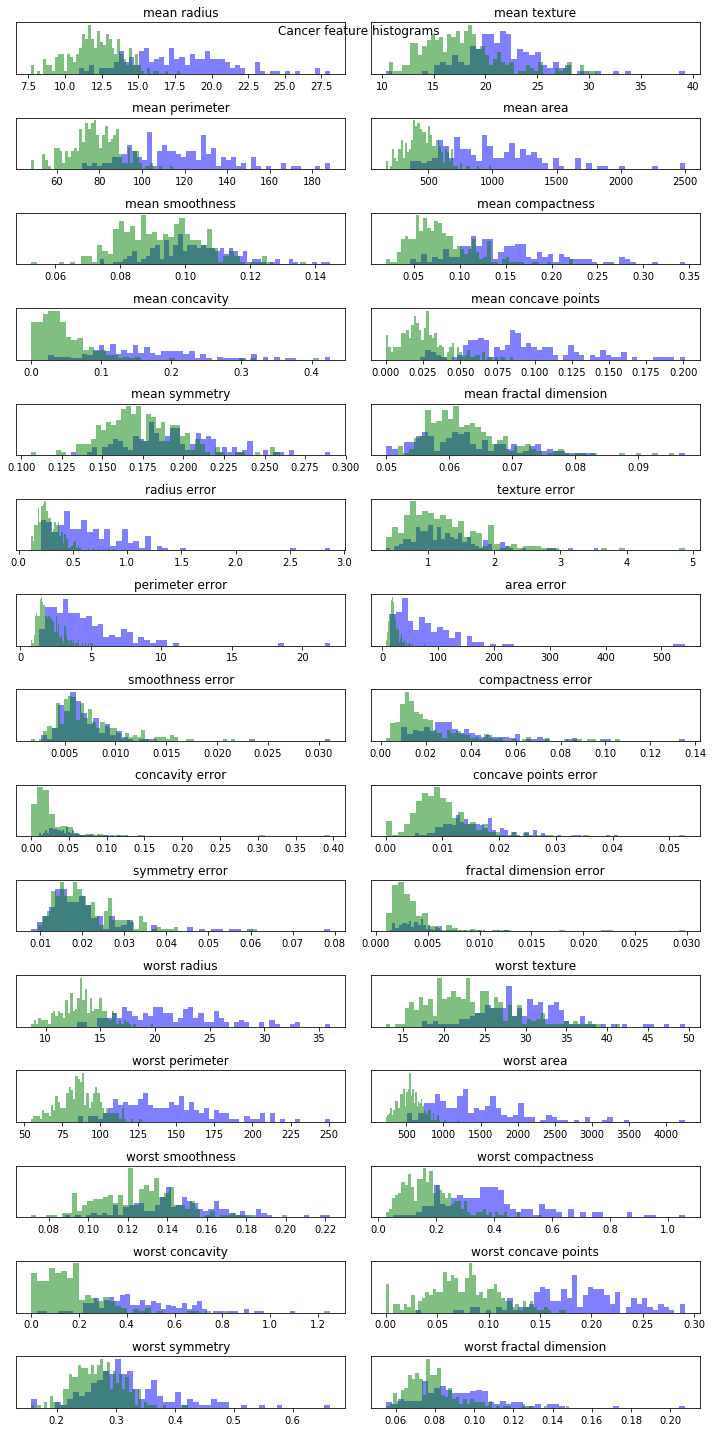

In [3]:
%matplotlib inline

fig, axes = plt.subplots(15,2,figsize=(10,20))
malignant = x_train[y_train==False,:] # try also without the dots
benign = x_train[y_train==True,:] # try also without the dots

ax = axes.ravel()

for i in range(30):
    ax[i].hist(malignant[:,i],bins=50,color='b',alpha=.5)
    ax[i].hist(benign[:,i],bins=50,color='g',alpha=.5)
    ax[i].set_title(bc.feature_names[i])
    ax[i].set_yticks([])
fig.tight_layout()
plt.suptitle('Cancer feature histograms')

    

# Preprocessing: feature reduction and scaling

In [4]:
components = 10
pca = PCA(n_components=components).fit(x_train)
xtr_new = pca.transform(x_train)
xte_new = pca.transform(x_test)
scaler = StandardScaler().fit(xtr_new)
xtr_new = scaler.transform(xtr_new)
xte_new = scaler.transform(xte_new)


# Visualize features after preprocessing

Text(0.5,0.98,'PCA feature histogram')

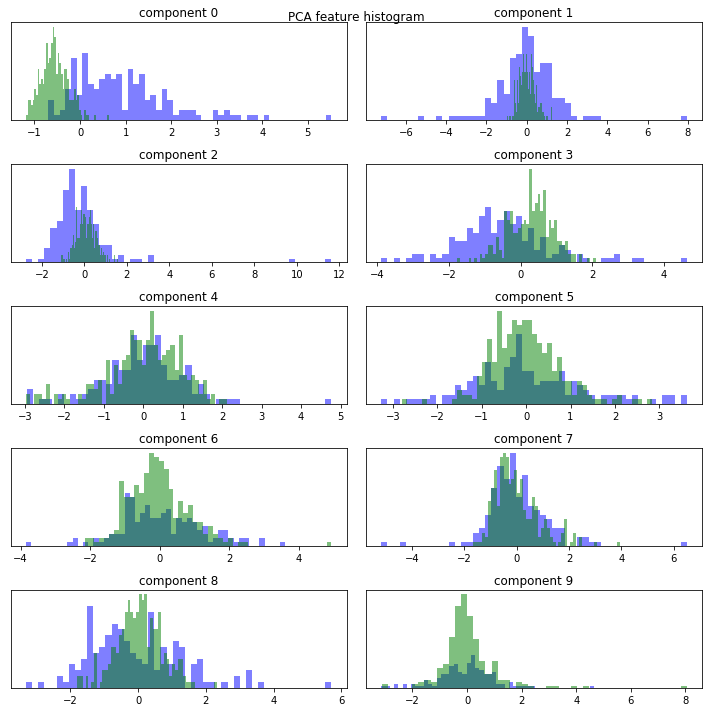

In [5]:
fig1, axes1 = plt.subplots(int(components/2),2, figsize=(10,10))

ax1 = axes1.ravel()

mal = xtr_new[y_train==False,:]
ben = xtr_new[y_train==True,:]

for i in range(components):
    ax1[i].hist(mal[:,i],bins=50,color='b',alpha=.5)
    ax1[i].hist(ben[:,i],bins=50,color='g',alpha=.5)
    ax1[i].set_yticks([])
    ax1[i].set_title('component %d' %i)
    
plt.tight_layout()
plt.suptitle("PCA feature histogram")

# Correlation matrix before and after pre-processing

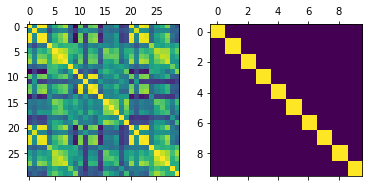

In [6]:
fig, ax = plt.subplots(1,2)
ax[0].matshow(DataFrame(bc.data).corr())
ax[1].matshow(DataFrame(xtr_new).corr())
# fig.colorbar(ticks=[0, 1])

In [20]:
nn = MLPClassifier(solver='sgd', alpha=1e-5,hidden_layer_sizes=[15, 20, 10], random_state=1)
nn.fit(xtr_new,y_train)
print(nn.score(xtr_new,y_train))
print(nn.score(xte_new,y_test))

0.863849765258216
0.8601398601398601


In [19]:
#implement genetic algorithm to tune NN

In [13]:
dtc = DecisionTreeClassifier().fit(xtr_new,y_train)
print(dtc.score(xtr_new,y_train))
print(dtc.score(xte_new,y_test))

1.0
0.916083916083916
